In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime

### Examine the passeneger traffic for holidays and major events:

    - NY marathon Nov,7 2021
    - Thanksgiving (parade) Nov 25, 2021
    - Christmas Dec 24 and Dec 25
    - New Years Dec 31 and Jan 1
    - Independence Day July 4
    

---

In [88]:
def reformat_df(df):
    '''Gets the most lodaded stations'''
    df = df.groupby("station").agg("sum").sort_values(by="entries_abs",ascending=False).head(20)
    return df

In [89]:
def plot_df(stations):
    '''Plots the data'''
    rows = 3
    cols = 3
    
    f, axs = plt.subplots(nrows = rows, ncols = cols, figsize = (15, 15))
    plt.subplots_adjust(hspace = 0.5, wspace = 0.9)
    
    # plot counter
    count = 0
    for r in range(rows):
        for c in range(cols):
            if count < len(stations):
                kwargs = {'alpha':0.85}
                sns.set_color_codes("pastel")
                sns.barplot(x = stations[count]['df']['exits_abs'], y = stations[count]['df'].index, data = stations[count]['df'],label = 'Exits', color = 'b',ax = axs[r,c], **kwargs)
                sns.barplot(x = stations[count]['df']['entries_abs'], y = stations[count]['df'].index, data = stations[count]['df'],label = 'Entries', color = 'r',ax = axs[r,c], **kwargs)
                
                axs[r,c].set_title('Traffic flow for ' + stations[count]['name'])
                axs[r,c].legend()
                count += 1
    f.delaxes(axs[2][2])
    f.delaxes(axs[2][1])
    plt.show()

---

In [90]:
# Read the data
df = pd.read_csv('../data/df_cleaned_year.csv')

/var/folders/5h/l2b3kn4j69bgsb2rqd8vqlw00000gn/T/ipykernel_31723/2673461455.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/df_cleaned_year.csv')


In [91]:
# split the main df into holiday and events dataframes:

df_marathon = df[df['date'] == '11/07/2021']
df_thanksgiving = df[df['date'] == '11/25/2021']
df_christmas_eve = df[df['date'] == '12/24/2021']
df_christmas_day =df[df['date'] == '12/25/2021']
df_newYear_eve = df[df['date'] == '12/31/2021']
df_newYear_day = df[df['date'] == '01/01/2022']
df_fourthOfJuly = df[df['date'] == '07/04/2022']

In [92]:
# Creating a dictionary with our dataframes and the names of the holidays: 

stations = [{'df':df_marathon, 'name':'Marathon'}, 
            {'df':df_thanksgiving, 'name':'Thanksgiving'}, 
            {'df':df_christmas_eve, 'name':'Christmas Eve'},
            {'df':df_christmas_day, 'name':'Christmas Day'},
            {'df':df_newYear_eve, 'name':'New Years Eve'}, 
            {'df':df_newYear_day, 'name':'New Years Day'}, 
            {'df':df_fourthOfJuly, 'name':'Fourth of July'}]

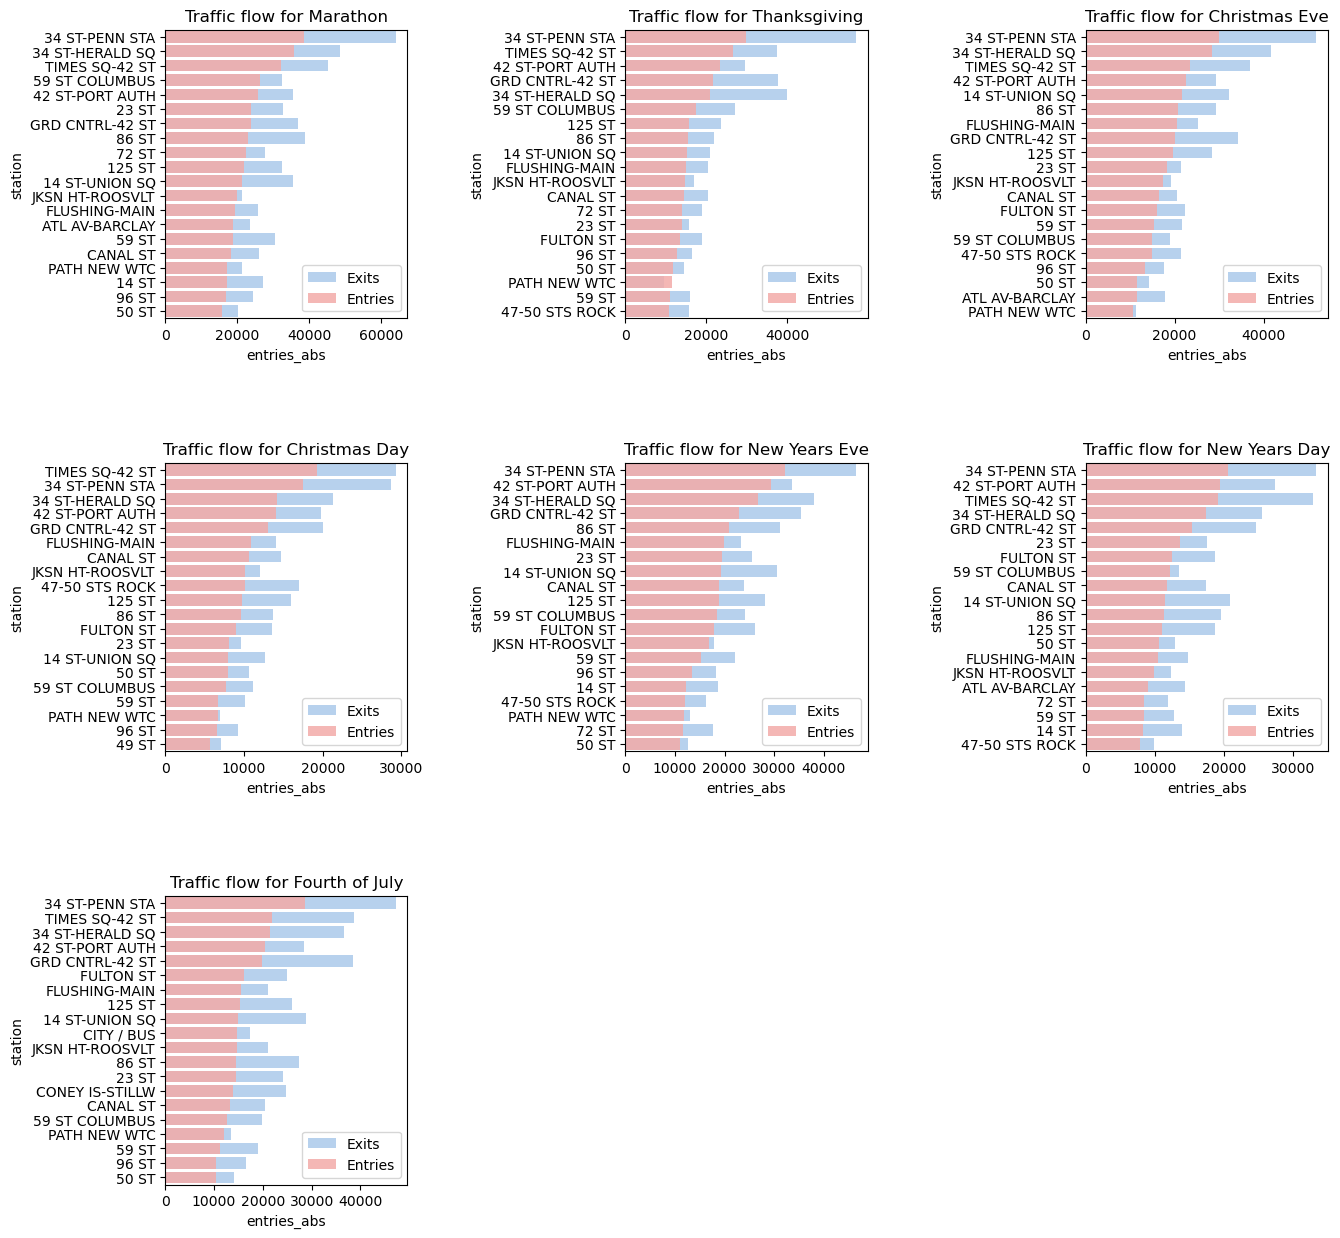

In [93]:
# Apply the functions to get the most loaded stations and plot the passenger traffic on holidays: 

for station in stations:
    station['df'] = reformat_df(station['df'])

plot_df(stations)

---

From the plot above we can see that the most loaded station on given days is 34 st Penn Station. 

Let's compare the passenger traffic on abovementioned days at 34 st Penn Station:

In [94]:
list_dates = ['11/07/2021', '11/25/2021', '12/24/2021', '12/25/2021', '12/31/2021', '01/01/2022', '07/04/2022', '08/17/2022', '09/11/2022']

In [95]:
df.datetime = pd.to_datetime(df.datetime)

df.set_index('datetime',inplace=True)

In [96]:
df_penn = df[df['station'] == '34 ST-PENN STA']
df_penn.head()

,stat_id,unit,scp,station,linename,date,entries_abs,exits_abs,weekday
datetime,,,,,,,,,
2021-10-23 04:00:00,34 ST-PENN STA 00-00-00 N067,R012,00-00-00,34 ST-PENN STA,ACE,10/23/2021,5,5,Saturday
2021-10-23 08:00:00,34 ST-PENN STA 00-00-00 N067,R012,00-00-00,34 ST-PENN STA,ACE,10/23/2021,6,64,Saturday
2021-10-23 12:00:00,34 ST-PENN STA 00-00-00 N067,R012,00-00-00,34 ST-PENN STA,ACE,10/23/2021,62,93,Saturday
2021-10-23 16:00:00,34 ST-PENN STA 00-00-00 N067,R012,00-00-00,34 ST-PENN STA,ACE,10/23/2021,92,98,Saturday
2021-10-23 20:00:00,34 ST-PENN STA 00-00-00 N067,R012,00-00-00,34 ST-PENN STA,ACE,10/23/2021,91,78,Saturday


In [97]:
df_penn = df_penn.resample('d').sum()

In [98]:
df_penn[df_penn.index.isin(list_dates)]

,entries_abs,exits_abs
datetime,,
2021-11-07,38565,64173
2021-11-25,29660,56968
2021-12-24,30063,51805
2021-12-25,17529,28687
2021-12-31,32173,46504
2022-01-01,20615,33361
2022-07-04,28736,47280
2022-08-17,55047,95177
2022-09-11,30731,59020


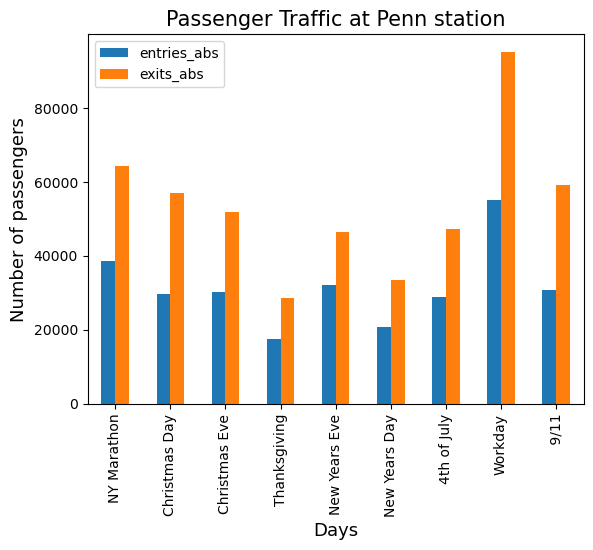

In [99]:
df_penn[df_penn.index.isin(list_dates)].plot(kind='bar')
plt.xlabel("Days", fontsize = 13)
plt.ylabel('Number of passengers', fontsize = 13)
plt.title("Passenger Traffic at Penn station", fontsize = 15)
plt.xticks(ticks = np.arange(9), labels = ['NY Marathon','Christmas Day','Christmas Eve', 'Thanksgiving', 'New Years Eve', 'New Years Day', '4th of July', 'Workday', ' 9/11'],rotation = 'vertical');
#plt.savefig("../resources/Passenger Traffic at Penn station.jpg");

---

The same thing for the Times sq. station:

In [100]:
df_times = df[df['station']=='TIMES SQ-42 ST']
df_times.head()

,stat_id,unit,scp,station,linename,date,entries_abs,exits_abs,weekday
datetime,,,,,,,,,
2021-10-23 04:00:00,TIMES SQ-42 ST 00-00-00 R145,R032,00-00-00,TIMES SQ-42 ST,1237ACENQRSW,10/23/2021,21,49,Saturday
2021-10-23 08:00:00,TIMES SQ-42 ST 00-00-00 R145,R032,00-00-00,TIMES SQ-42 ST,1237ACENQRSW,10/23/2021,16,89,Saturday
2021-10-23 12:00:00,TIMES SQ-42 ST 00-00-00 R145,R032,00-00-00,TIMES SQ-42 ST,1237ACENQRSW,10/23/2021,95,210,Saturday
2021-10-23 16:00:00,TIMES SQ-42 ST 00-00-00 R145,R032,00-00-00,TIMES SQ-42 ST,1237ACENQRSW,10/23/2021,94,409,Saturday
2021-10-23 20:00:00,TIMES SQ-42 ST 00-00-00 R145,R032,00-00-00,TIMES SQ-42 ST,1237ACENQRSW,10/23/2021,104,439,Saturday


In [101]:
df_times = df_times.resample('d').sum()
df_times

,entries_abs,exits_abs
datetime,,
2021-10-23,19855,38873
2021-10-24,22983,35124
2021-10-25,30071,41465
2021-10-26,26232,39413
2021-10-27,33620,48149
...,...,...
2022-10-17,30770,56761
2022-10-18,33715,65468
2022-10-19,37892,70221


In [102]:
df_times[df_times.index.isin(list_dates)]

,entries_abs,exits_abs
datetime,,
2021-11-07,32301,45235
2021-11-25,26609,37403
2021-12-24,23522,37007
2021-12-25,19223,29302
2021-12-31,9505,32704
2022-01-01,19123,32880
2022-07-04,21874,38769
2022-08-17,36144,65148
2022-09-11,23847,46826


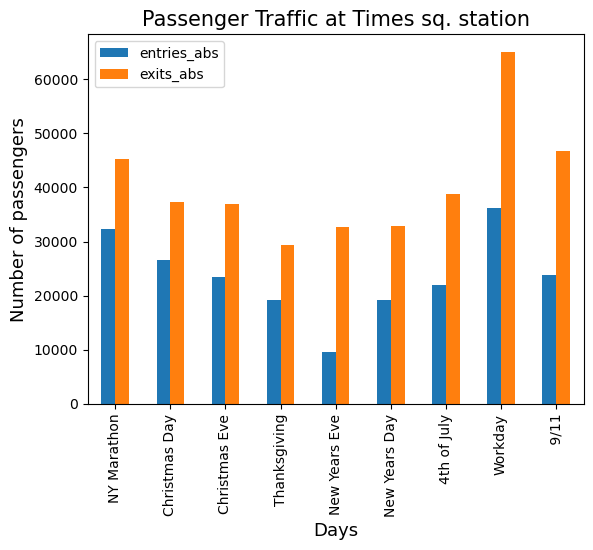

In [103]:
df_times[df_times.index.isin(list_dates)].plot(kind='bar')
plt.xlabel("Days", fontsize = 13)
plt.ylabel('Number of passengers', fontsize = 13)
plt.title("Passenger Traffic at Times sq. station", fontsize = 15)
plt.xticks(ticks = np.arange(9), labels = ['NY Marathon','Christmas Day','Christmas Eve', 'Thanksgiving', 'New Years Eve', 'New Years Day', '4th of July', 'Workday', ' 9/11'],rotation = 'vertical');
#plt.savefig("../resources/Passenger Traffic at Penn station.jpg");

---

Same thing for Canal Station: 

In [104]:
df_canal = df[df['station']=='CANAL ST']

In [105]:
df_canal = df_canal.resample('d').sum()

In [106]:
df_canal[df_canal.index.isin(list_dates)]

,entries_abs,exits_abs
datetime,,
2021-11-07,18208,26214
2021-11-25,14514,20494
2021-12-24,16400,20591
2021-12-25,10663,14746
2021-12-31,18862,23817
2022-01-01,11727,17375
2022-07-04,13332,20367
2022-08-17,24213,38174
2022-09-11,18793,31079


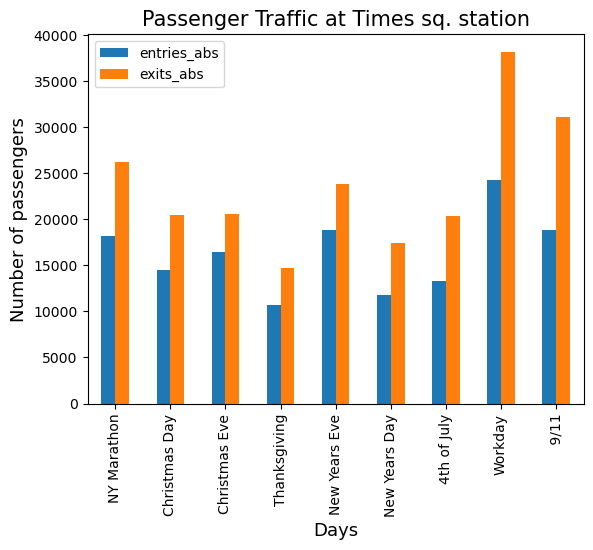

In [107]:
df_canal[df_canal.index.isin(list_dates)].plot(kind='bar')
plt.xlabel("Days", fontsize = 13)
plt.ylabel('Number of passengers', fontsize = 13)
plt.title("Passenger Traffic at Times sq. station", fontsize = 15)
plt.xticks(ticks = np.arange(9), labels = ['NY Marathon','Christmas Day','Christmas Eve', 'Thanksgiving', 'New Years Eve', 'New Years Day', '4th of July', 'Workday', ' 9/11'],rotation = 'vertical');
#plt.savefig("../resources/Passenger Traffic at Penn station.jpg");